In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from gensim.models import Word2Vec

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing datasets
df_isear = pd.read_csv("isear.csv", sep= "|", engine='python', error_bad_lines=False, quoting=csv.QUOTE_NONE,warn_bad_lines=False)
df_wassa = pd.read_csv("emotion-labels-train.csv")
df_isear = df_isear[["SIT","Field1"]]
print('ISEAR dataset size:',df_isear.shape)
print('WASSA dataset size:',df_wassa.shape)

ISEAR dataset size: (7503, 2)
WASSA dataset size: (3613, 2)


In [3]:
# Renaming ISEAR dataset column names to accurately describe the columns
df_isear.rename(columns={'SIT': 'text', 'Field1': 'label'}, inplace=True)

# Combining datasets
df = pd.concat([df_isear,df_wassa])

# Display new dataset and its size
print('Combined dataset size:', df.shape)
df.sample(10)

Combined dataset size: (11116, 2)


,text,label
6557,"In May 18th, 1984 my boyfriend went to the U.S...",sadness
2688,I get angry with people who attain certain sta...,anger
3622,"During the funeral of my grandmother, when I s...",sadness
7130,I quarrelled with my brothers (twins) at home ...,anger
7461,When I asked my classmate to teach me to do my...,shame
3058,When I failed my first exam at the Higher Inst...,fear
2373,Now that I have my ex's number now its time to...,anger
729,Research has determined 70% of #laughter is ac...,joy
2046,I dislike people who get offended by the littl...,anger
3801,Seeing for the first time pictures about the s...,anger


## Data Visualization

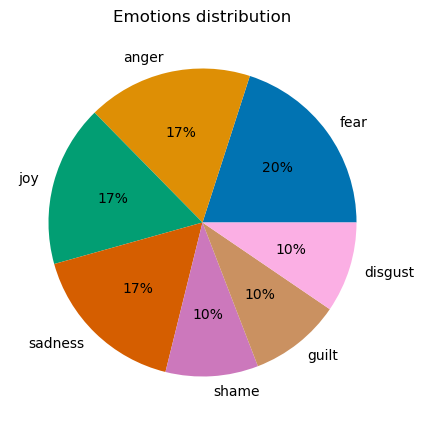

In [4]:
# Creating emotion label pie chart

label_count = df.label.value_counts() / len(df) * 100

# selecting Seaborn color palette to use
palette_color = sns.color_palette('colorblind') 

# plotting data
plt.pie(label_count, labels=label_count.index, colors=palette_color,autopct='%.0f%%')

# title of plot
plt.title("Emotions distribution")
plt.gcf().set_size_inches(5,5)

# displaying chart
plt.show()

In [5]:
label_count

fear       20.025189
anger      17.335372
joy        16.984527
sadness    16.786614
shame       9.724721
guilt       9.625765
disgust     9.517812
Name: label, dtype: float64

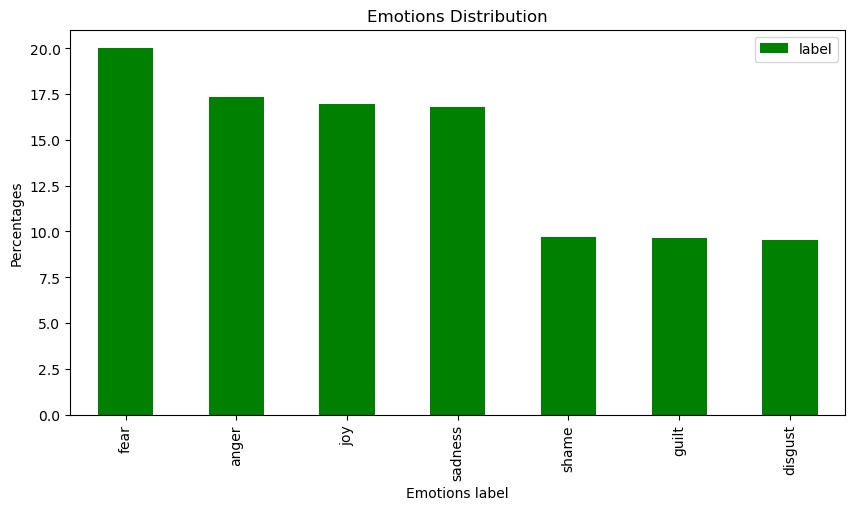

In [6]:
# Creating a bar chart

# convert series to dataframe
label_count_df = label_count.to_frame()
label_count_df.plot(kind='bar',  color= 'green')
 
# labels for x & y axis
plt.xlabel('Emotions label')
plt.ylabel('Percentages')
 
# title of plot
plt.title("Emotions Distribution")
plt.gcf().set_size_inches(10,5)

# Preprocessing Data

In [4]:
# Function to remove twitter mentions and hyperlinks. 
def tweet_UserFilter(text):
    new_text = []
    for user in text.split(' '):
        if len(user) > 0:
            if user[0] == '@' and len(user) > 1:
                pass
            elif user.startswith("https"):
                pass
            else:
                new_text.append(user)
    return ' '.join(new_text)

# define a function to remove special characters, punctuation, and numbers.
def clean_text(text):
    text = re.sub('[^A-Za-z ]+', '', text) # remove special characters
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\s+', ' ', text) # remove extra whitespaces
    text = text.lower() # convert to lowercase
    return text.strip() # remove extra white space

In [5]:
# Removing unnecessary information
df['prepped_text'] = df['text'].apply(tweet_UserFilter)
df['prepped_text'] = df['prepped_text'].apply(clean_text)

# Removing stop-words from text
df['prepped_text'] = df['prepped_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Tokenization
df['tokens'] = df['prepped_text'].apply(word_tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Label Encoding emotions 
le = LabelEncoder()
df['labels_encoded'] = le.fit_transform(df['label'])

In [9]:
# Displaying dataframe
df.sample(10)

,text,label,prepped_text,tokens,lemmatized,labels_encoded
3573,@CrucialBMXShop ohh silver lake came up a lot ...,sadness,ohh silver lake came lot guys stayed,"[ohh, silver, lake, came, lot, guys, stayed]","[ohh, silver, lake, came, lot, guy, stayed]",5
3110,When my grandmother died very suddenly without...,sadness,grandmother died suddenly without warning,"[grandmother, died, suddenly, without, warning]","[grandmother, died, suddenly, without, warning]",5
2048,@justyne_haley it does. if one person ruins se...,anger,one person ruins season angry,"[one, person, ruins, season, angry]","[one, person, ruin, season, angry]",0
7352,When I was young I felt ashamed when our relat...,shame,young felt ashamed relatives visited us hid,"[young, felt, ashamed, relatives, visited, us,...","[young, felt, ashamed, relative, visited, u, hid]",6
1539,@EurekaForbes U got to b kidding me. Anu from ...,fear,u got b kidding anu firm responded sent contac...,"[u, got, b, kidding, anu, firm, responded, sen...","[u, got, b, kidding, anu, firm, responded, sen...",2
4930,My sister lost one of her twin sons (my first ...,sadness,sister lost one twin sons first nephews older ...,"[sister, lost, one, twin, sons, first, nephews...","[sister, lost, one, twin, son, first, nephew, ...",5
666,My mother accused me of not visiting her enoug...,guilt,mother accused visiting enough hospital eye op...,"[mother, accused, visiting, enough, hospital, ...","[mother, accused, visiting, enough, hospital, ...",3
6495,In my village there was this tax collector who...,disgust,village tax collector used cheat people collec...,"[village, tax, collector, used, cheat, people,...","[village, tax, collector, used, cheat, people,...",1
4340,I thought that I would be scolded for a commen...,fear,thought would scolded comment made made,"[thought, would, scolded, comment, made, made]","[thought, would, scolded, comment, made, made]",2
1932,This is a terrific university-a unique univers...,fear,terrific universitya unique universityathabasc...,"[terrific, universitya, unique, universityatha...","[terrific, universitya, unique, universityatha...",2


In [10]:
# Checking for empty rows
df.isnull().sum()

text              0
label             0
prepped_text      0
tokens            0
lemmatized        0
labels_encoded    0
dtype: int64

In [6]:
# Removing unneccesary columns
df = df[['lemmatized', 'labels_encoded']]
df.sample(7)

,lemmatized,labels_encoded
1562,"[wanted, kiss, friend, didnt, succeed, felt, s...",6
1932,"[became, aware, acquaintance, stolen, friend]",1
5470,"[pet, died, pet, closest, friend, year]",5
6029,"[get, admission, felt, disgusted]",1
3458,"[put, winter, duvet, serious]",5
4703,"[elder, sister, scolded, front, younger, siste...",5
4222,"[party, went, last, christmas]",4


## Splitting the dataset

In [12]:
# Get the features (embeddings and labels)
x = df['lemmatized'].values
y = df['labels_encoded'].values

# Split the data into training, validation, and testing sets (70-15-15 split)
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.50, random_state=42)

# Printing the shape of the sets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (7781,)
Validation set shape: (1667,)
Testing set shape: (1668,)


## Convolutional Neural Network (CNN) model

In [13]:
import tensorflow as tf
import numpy as np

# Function to add padding to input variables
def padding(x_train, x_test, x_val):
    # create a dictionary to map words to indices
    word_to_index = {}
    
     # Combine all the sentences from training, test, and validation data
    all_sentences = np.concatenate((x_train, x_test, x_val), axis=0)
    
    for sentence in all_sentences:
        for word in sentence:
            if word not in word_to_index:
                word_to_index[word] = len(word_to_index) + 1

    # convert the sentences to sequences of indices
    sequences_train = [[word_to_index[word] for word in sentence] for sentence in x_train]
    sequences_test = [[word_to_index[word] for word in sentence] for sentence in x_test]
    sequences_val = [[word_to_index[word] for word in sentence] for sentence in x_val]
    
    # pad the sequences to the same length
    max_len = max([len(seq) for seq in sequences_train + sequences_test + sequences_val])
    x_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train, maxlen=max_len)
    x_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen=max_len)
    x_val = tf.keras.preprocessing.sequence.pad_sequences(sequences_val, maxlen=max_len)
    
    return x_train, x_test, x_val, word_to_index, max_len

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

x_train_padded, x_test_padded, x_val_padded, words, max_len = padding(x_train, x_test, x_val)

# define the model architecture
model = Sequential()
model.add(Embedding(len(words) + 1, 500, input_length=max_len))
model.add(Bidirectional(GRU(64))) # Bidirectional GRU layer
model.add(Flatten())
model.add(Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(Dense(7, activation='softmax',  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_padded, y_train, epochs=16, batch_size=32, validation_data=(x_val_padded, y_val))

# Model accuracy
test_loss, test_acc = model.evaluate(x_test_padded, y_test)
print("Model Accuracy:", test_acc)

Epoch 1/16
244/244 [==============================] - 25s 95ms/step - loss: 1.8771 - accuracy: 0.3703 - val_loss: 1.4521 - val_accuracy: 0.5039
Epoch 2/16
244/244 [==============================] - 24s 97ms/step - loss: 1.0768 - accuracy: 0.6665 - val_loss: 1.3242 - val_accuracy: 0.5993
Epoch 3/16
244/244 [==============================] - 24s 97ms/step - loss: 0.7073 - accuracy: 0.8112 - val_loss: 1.4143 - val_accuracy: 0.5939
Epoch 4/16
244/244 [==============================] - 24s 98ms/step - loss: 0.5182 - accuracy: 0.8823 - val_loss: 1.4963 - val_accuracy: 0.5843
Epoch 5/16
244/244 [==============================] - 24s 98ms/step - loss: 0.4087 - accuracy: 0.9198 - val_loss: 1.6736 - val_accuracy: 0.5735
Epoch 6/16
244/244 [==============================] - 24s 98ms/step - loss: 0.3427 - accuracy: 0.9400 - val_loss: 1.7247 - val_accuracy: 0.5771
Epoch 7/16
244/244 [==============================] - 24s 98ms/step - loss: 0.3032 - accuracy: 0.9506 - val_loss: 1.8198 - val_accuracy:

## Predictions

In [15]:
# Make predictions
predictions = model.predict(x_test_padded)

# Get the predicted class for each sample
prediction = predictions.argmax(axis=1)

# Create a DataFrame with predicted classes and true labels
df_predict = pd.DataFrame({'Predicted': prediction, 'True Label': y_test})

# Display the DataFrame
df_predict

53/53 [==============================] - 1s 21ms/step


,Predicted,True Label
0,5,5
1,2,2
2,6,3
3,0,0
4,2,2
...,...,...
1663,5,5
1664,3,0
1665,6,6
1666,0,0


## Validation

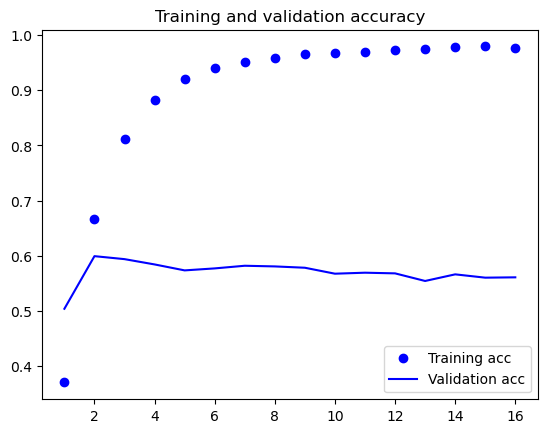

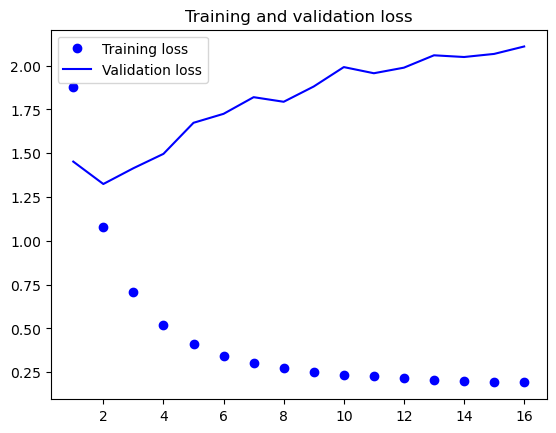

In [16]:
history_dict = history.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Creating a validation plot
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Creating a accuracy plot
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Other Models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Convert the lemmatized text from a list to a string
df['lemmatized'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# Split the dataframe into features and target variable
x = np.array(df['lemmatized'])
y = np.array(df['labels_encoded'])

# Convert lemmatized text into numerical representation using TF-IDF vectorization
vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

In [8]:
# Training the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Evaluating the Naive Bayes classifier
nb_accuracy = nb_classifier.score(x_test, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)

# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

# Evaluating the Decision Tree classifier
dt_accuracy = dt_classifier.score(x_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

# Training the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

# Evaluating the Random Forest classifier
rf_accuracy = rf_classifier.score(x_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Naive Bayes Accuracy: 0.58318345323741
Decision Tree Accuracy: 0.5638489208633094
Random Forest Accuracy: 0.6344424460431655
